# Exploring the Effectiveness of Betting Odds and Half Time Results for Predicting Football Match Outcomes

#### Sahaj Khanna(40672545) and Apram Ahuja(14367403)

In [25]:
# import packages and set themes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.metrics import (confusion_matrix, classification_report)
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
%matplotlib inline

# Abstract 

The increasing popularity of football globally has spurred a growing interest in predicting the outcomes of football matches. Various highly complex models have been built by sports analytics companies and football clubs themselves that take into account all the available data such as team performance in past matches, injuries and suspensions, head to head record, and team tactics to predict the result as accurately as possible. However, another promising avenue involved the use of widely available betting odds, which often already incorporate information pertaining to the past performance and form of the teams. It is important to note, however, that these odds do not accurately reflect the probability of a particular outcome, as they are adjusted to mitigate the sportsbook's risk and ensure their profitability. So, even though they are likely to incorporate all the available information about the teams, they ultimately ensure that the house never loses.  

For the first part of this project, we analyse how accurately do betting odds in itself predict the outcomes of football matches. Afterwards, we frame this prediction problem both as a classification and regression problem. We train regression and classification models on the available betting data and see whether it would be possible to increase the accuracy of betting odds using these models. 

Lastly, we decide to explore another question that can be answered using the available dataset. In football, matches are divided into two equal halves of 45 minutes each. At first glance, the results of the both halves should be independent. In other words, if the home team has scored 3 goals before half time, it is entirely plausible for the away team to also score 3 in the second half.

However, Since the difference in quality and performance of the two teams is already evident by the first half, therefore the team with the score advantage by half time, should be far more likely to win when the full time whistle blows. 

# The Dataset 

The training and testing data used for this part of the project was obtained from http://www.football-data.co.uk/.  The website provided downloadable csv files containing data about matches from the top 5 leagues in England going back to 1993. However, the further we go back, the data used to have various missing features. Consequently, we decide to use data for the top 5 leagues from 2019 to 2022, which gives us data from 20 complete football seasons and some consistency in the avaliable features. 

# Data Cleaning 

In [2]:
# Reading all the csv files
#prem league
dfp_2022  =  pd.read_csv('data/E2022.csv', skip_blank_lines=True)
dfp_2021  =  pd.read_csv('data/E2021.csv', skip_blank_lines=True)
dfp_2020  =  pd.read_csv('data/E2020.csv', skip_blank_lines=True)
dfp_2019  =  pd.read_csv('data/E2019.csv', skip_blank_lines=True)
#champions league
dfc_2022  =  pd.read_csv('data/E1_c2022.csv', skip_blank_lines=True)
dfc_2021 =  pd.read_csv('data/E1_c2021.csv', skip_blank_lines=True)
dfc_2020 =  pd.read_csv('data/E1_c2020.csv', skip_blank_lines=True)
dfc_2019 =  pd.read_csv('data/E1_c2019.csv', skip_blank_lines=True)
#league 1
dfl1_2022 =  pd.read_csv('data/E2_l12022.csv', skip_blank_lines=True)
dfl1_2021 =  pd.read_csv('data/E2_l12021.csv', skip_blank_lines=True)
dfl1_2020 =  pd.read_csv('data/E2_l12020.csv', skip_blank_lines=True)
dfl1_2019 =  pd.read_csv('data/E2_l12019.csv', skip_blank_lines=True)
#league 2
dfl2_2022 =  pd.read_csv('data/E3_l22022.csv', skip_blank_lines=True)
dfl2_2021 =  pd.read_csv('data/E3_l22021.csv', skip_blank_lines=True)
dfl2_2020 =  pd.read_csv('data/E3_l22020.csv', skip_blank_lines=True)
dfl2_2019 =  pd.read_csv('data/E3_l22019.csv', skip_blank_lines=True)

In this code block, we have removed the rows that contained missing data along with the columns that would not be used throughout the project or contained various missing columns. 

In [3]:
#Cleaning Data for the Premier League 
dfp_list = [dfp_2022 , dfp_2021, dfp_2020, dfp_2019]
dfp = pd.concat(dfp_list,ignore_index = True)

def remove_col(df, col_list):
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df
column_remove_list = dfp.columns[dfp.isna().any()].tolist() #list of all unwanted columns which are either unused or conflicting
dfp_clean = remove_col(dfp,column_remove_list) 

#Cleaning Data for the Championship 
dfc_list = [dfc_2022 , dfc_2021, dfc_2020, dfc_2019]
dfc = pd.concat(dfc_list,ignore_index = True)

def remove_col(df, col_list):
    df = df.drop(columns = col_list, axis=1) #to remove the specified column list
    return df
column_remove_list = dfc.columns[dfc.isna().any()].tolist() #list of all unwanted columns which are either unused or conflicting
dfc_clean = remove_col(dfc,column_remove_list) 

#Cleaning Data for League 1
dfl1_list = [dfl1_2022 , dfl1_2021, dfl1_2020, dfl1_2019]
dfl1 = pd.concat(dfl1_list,ignore_index = True)

def remove_col(df, col_list):
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df
column_remove_list = dfl1.columns[dfl1.isna().any()].tolist() #list of all unwanted columns which are either unused or conflicting
dfl1_clean = remove_col(dfl1,column_remove_list) 

#Cleaning Data for League 2
dfl2_list = [dfl2_2022 , dfl2_2021, dfl2_2020, dfl2_2019]
dfl2 = pd.concat(dfl2_list,ignore_index = True)

def remove_col(df, col_list):
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df
column_remove_list = dfl2.columns[dfl2.isna().any()].tolist() #list of all unwanted columns which are either unused or conflicting
dfl2_clean = remove_col(dfl2,column_remove_list) 

Now, we concatenate the data from the different leagues and years so that they can be accessed in the same dataframe. Through this process, we also remove columns that will not be used throughout the project and are corrupting our dataframe with Null Values.  

In [4]:
df_list = [dfp_clean , dfc_clean, dfl1_clean, dfl2_clean]
df = pd.concat(df_list,ignore_index = True)
def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df

column_remove_list = df.columns[df.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
df_clean = remove_col(df,column_remove_list) 


After looking over the final dataset, we observe that the betting odds provided by various companies are extremely similar which would make it redudant to incorporate all of them. As a result, we just incorporate the betting odds provided by the 2 most well known bookmakers and the market average provided in the dataset. 

In [5]:
betodds_list = ['Div','HomeTeam','AwayTeam','FTHG','FTAG','FTR',
                'B365H','B365D','B365A','BWH', 'BWD', 'BWA','AvgH','AvgD','AvgA']
betodds = df_clean.loc[:,betodds_list]
betodds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7619 non-null   object 
 1   HomeTeam  7619 non-null   object 
 2   AwayTeam  7619 non-null   object 
 3   FTHG      7619 non-null   int64  
 4   FTAG      7619 non-null   int64  
 5   FTR       7619 non-null   object 
 6   B365H     7619 non-null   float64
 7   B365D     7619 non-null   float64
 8   B365A     7619 non-null   float64
 9   BWH       7619 non-null   float64
 10  BWD       7619 non-null   float64
 11  BWA       7619 non-null   float64
 12  AvgH      7619 non-null   float64
 13  AvgD      7619 non-null   float64
 14  AvgA      7619 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 893.0+ KB


**These features describe the events that occur in the game, such as total goals by the home side (FTHG). The list below describes what each of these mean.**

1. Div = League Division 
2. HomeTeam = Home Team
3. AwayTeam = Away Team
4. FTHG = Full Time Home Team Goals
5. FTAG = Full Time Away Team Goals
6. FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
7. B365H = Bet365 home win odds
8. B365D = Bet365 draw odds
9. B365A = Bet365 away win odds
10. BWH = Bet&Win home win odds
11. BWD = Bet&Win draw odds
12. BWA = Bet&Win away win odds
13. AvgH = Market average home win odds
14. AvgD = Market average draw win odds
15. AvgA = Market average away win odds 

# Regression vs Classification

Due to the nature of football matches, predicting the results of the matches can be framed as both a classification and a regression problem. Classification would be a multiclass classification problem wherein we would predict the **Full Time Results/FTR** Column which involves 3 classes. To frame this as a regression problem, we can calculate the **Goal Difference**. Goal Difference is defined as: **Difference between goals scored by the home team and the away team**. So, a positive Goal Difference implies that the **Home Team Won** since they scored more goals. Similarly, negative goal difference implies that the **Away Team Won** and a goal difference of 0 implies that the match was a **Draw**, since both teams scored the same number of goals. 

In [6]:
# Creating a new column for goal difference and reindexing 
betodds["GD"] = betodds["FTHG"] - betodds["FTAG"]
new_columns = ['Div', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'GD',
       'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA','AvgH', 'AvgD', 'AvgA']
betodds = betodds.reindex(columns = new_columns)
betodds.head()

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,GD,B365H,B365D,B365A,BWH,BWD,BWA,AvgH,AvgD,AvgA
0,E0,Crystal Palace,Arsenal,0,2,A,-2,4.20,3.6,1.85,4.33,3.50,1.87,4.39,3.59,1.88
1,E0,Fulham,Liverpool,2,2,D,0,11.00,6.0,1.25,10.00,5.75,1.28,10.99,6.05,1.28
2,E0,Bournemouth,Aston Villa,2,0,H,2,3.75,3.5,2.00,3.75,3.40,2.00,3.80,3.50,2.04
3,E0,Leeds,Wolves,2,1,H,1,2.25,3.4,3.20,2.30,3.30,2.95,2.34,3.34,3.18
4,E0,Newcastle,Nott'm Forest,2,0,H,2,1.66,3.8,5.25,1.65,3.80,5.50,1.67,3.80,5.57


Before starting our analysis, we want to see how accurate betting odds are in itself. Since betting odds imply the payout one can get if they place a bet on any of the particular outcomes. The outcome with the least payout is the one that is the most likely. So, to classify the prediction of betting odds, we find the outcome that has the least value and attribute that as the prediction of those particular odds.  

In [7]:
# Creating a column that gives us the prediction by the B365 odds 
three_odds = betodds[["B365H", "B365D", "B365A"]]
pd_new = pd.Series(data = three_odds.idxmin(axis = 1)) 
three_odds["BetPred"] = pd_new
odds_three = three_odds["BetPred"]

# Creating a column that gives us the prediction by the BW odds 
BW_odds = betodds[["BWH", "BWD", "BWA"]]
pd_new_2 = pd.Series(data = BW_odds.idxmin(axis = 1)) 
BW_odds["BWPred"] = pd_new_2
odds_BW = BW_odds["BWPred"]

# Creating a columns that gives us the average prediction 
average_odds = betodds[["AvgH", "AvgD", "AvgA"]]
pd_new_1 = pd.Series(data = average_odds.idxmin(axis = 1)) 
average_odds["AvgPred"] = pd_new_1
odds_average = average_odds["AvgPred"]

#Merging the datasets with the predictions from odds 
final = pd.merge(betodds, odds_three, left_index = True, right_index = True)
final_2 = pd.merge(final, odds_BW, left_index = True, right_index = True)
betodds_predictions = pd.merge(final_2, odds_average, left_index = True, right_index = True)

Now, we clean the predictions made by the odds so that they can be matched with the full time results column and the accuracy of the predictions can be computed. 

In [8]:
#Cleaning the predictions made by odds so that they can be matched with the Full Time Results 
betodds_predictions["BetPred"] = betodds_predictions["BetPred"].apply(lambda x: x.replace("B365", "").strip())
betodds_predictions["AvgPred"] = betodds_predictions["AvgPred"].apply(lambda x: x.replace("Avg", "").strip())
betodds_predictions["BWPred"] = betodds_predictions["BWPred"].apply(lambda x: x.replace("BW", "").strip())

#Reindexing the columns 
final_columns = ['Div', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'GD',
       'B365H', 'B365D', 'B365A', 'BetPred', 'BWH', 'BWD', 'BWA','BWPred','AvgH', 'AvgD', 'AvgA', 'AvgPred']
betodds_with_predictions = betodds_predictions.reindex(columns = final_columns)
betodds_with_predictions.head()

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,GD,B365H,B365D,B365A,BetPred,BWH,BWD,BWA,BWPred,AvgH,AvgD,AvgA,AvgPred
0,E0,Crystal Palace,Arsenal,0,2,A,-2,4.20,3.6,1.85,A,4.33,3.50,1.87,A,4.39,3.59,1.88,A
1,E0,Fulham,Liverpool,2,2,D,0,11.00,6.0,1.25,A,10.00,5.75,1.28,A,10.99,6.05,1.28,A
2,E0,Bournemouth,Aston Villa,2,0,H,2,3.75,3.5,2.00,A,3.75,3.40,2.00,A,3.80,3.50,2.04,A
3,E0,Leeds,Wolves,2,1,H,1,2.25,3.4,3.20,H,2.30,3.30,2.95,H,2.34,3.34,3.18,H
4,E0,Newcastle,Nott'm Forest,2,0,H,2,1.66,3.8,5.25,H,1.65,3.80,5.50,H,1.67,3.80,5.57,H


Now, we create a visualisation to see how accurate the predictions given by the odds are. 

(Text(17.569444444444457, 0.5, 'True Values'),
 Text(512.5694444444446, 0.5, 'True Values'),
 Text(1007.5694444444447, 0.5, 'True Values'))

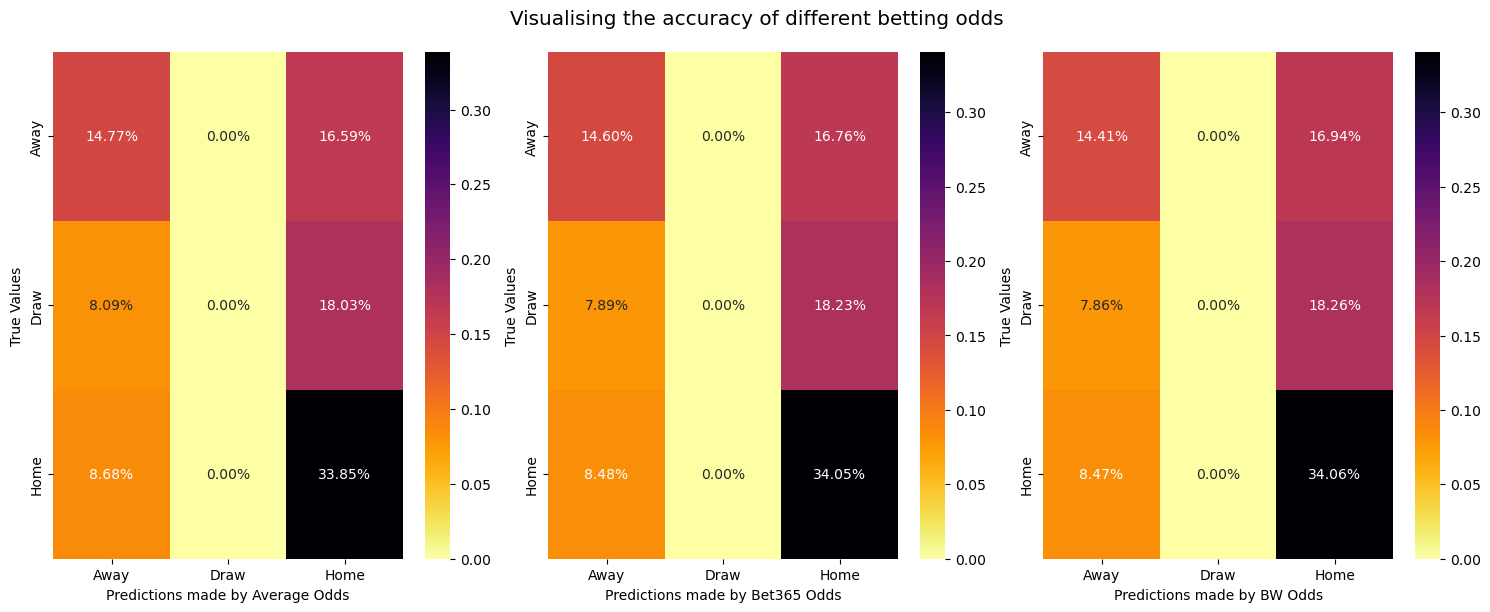

In [9]:
# Creating a confusion matrix to see how accurate odds are in itself 
results = betodds_with_predictions["FTR"] 
avg_pred = betodds_with_predictions["AvgPred"]
cf_matrix_1 = confusion_matrix(results, avg_pred, labels=["A", "D", "H"])
pred_365 = betodds_with_predictions["BetPred"]
cf_matrix_2 = confusion_matrix(results, pred_365, labels=["A", "D", "H"])
pred_bw = betodds_with_predictions["BWPred"]
cf_matrix_3 = confusion_matrix(results, pred_bw, labels=["A", "D", "H"])

#Creating the visualisation using seaborn 
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle("Visualising the accuracy of different betting odds", size = "x-large")
fig.tight_layout()
sns.heatmap(cf_matrix_3/np.sum(cf_matrix_3), annot=True, fmt='.2%', cmap='inferno_r', ax = ax[2], xticklabels = ["Away", "Draw", "Home"], 
            yticklabels = ["Away", "Draw", "Home"])

sns.heatmap(cf_matrix_1/np.sum(cf_matrix_1), annot=True, fmt='.2%', cmap='inferno_r', ax = ax[0], xticklabels = ["Away", "Draw", "Home"], 
            yticklabels = ["Away", "Draw", "Home"])

sns.heatmap(cf_matrix_2/np.sum(cf_matrix_2), annot=True, fmt='.2%', cmap='inferno_r', ax = ax[1], xticklabels = ["Away", "Draw", "Home"], 
           yticklabels = ["Away", "Draw", "Home"])
ax[0].set_xlabel("Predictions made by Average Odds"), ax[1].set_xlabel("Predictions made by Bet365 Odds"), ax[2].set_xlabel("Predictions made by BW Odds")
ax[0].set_ylabel("True Values"), ax[1].set_ylabel("True Values"), ax[2].set_ylabel("True Values")


Through this visualisation, we can infer some interesting things: 
1. Firstly, we see that the betting odds do not predict the draw outcome at all. This could be because draw is often not the most likely outcome. But, is a result of random processes such as Penalties being given, the Better team underperforming, or Players getting red carded. 
2. Another interesting thing is that odds are more accurate when they predict the Home team as the winner. That is, the odds are more likely to be correct when they predict the home team as the winner. This could be related to the **home advantage** where the home team wins more matches because they are playing at a familiar stadium. 
3. Lastly, we see that that the 3 odds are all equally accurate; roughly, around **48.5%**. This reinforces our previous point where the odds are extremely similar to each other. This accuracy is not bad, since it's much better than a random guess which should theoretically sit around 33%. 

# Regression 

Moving on to the fun part now, we train multiple regression models on the available odds and ask it to predict the goal difference which we can then convert into a prediction about the actual outcome of the match. We start by training a simple linear regression model. But before that, we first split the data into testing and training data. 

In [10]:
# Creating the X dataset 
betting_X = betodds_with_predictions[["B365H", "B365D","B365A","BWH","BWD","BWA","AvgH", "AvgD", "AvgA"]]
# Creating the y dataset 
betting_y = betodds_with_predictions["GD"]
#Splitting the dataset into testing and training datasets 
betting_X_train, betting_X_test, betting_y_train, betting_y_test = model_selection.train_test_split(betting_X, betting_y, test_size=0.25, random_state = 123)

In [11]:
# Creating a linear regression model first 
match_pred_model = linear_model.LinearRegression()
match_pred_model.fit(betting_X_train, betting_y_train) 

#Creating a function that classifies the result from the actual goal difference values 
def goal_difference_result(x): 
    if x > 0: 
        out = "H"
    elif x == 0: 
        out = "D" 
    elif x < 0: 
        out = "A"
    return out 
goal_difference_actual = np.vectorize(goal_difference_result)

#Creating a function that classifies the result from the predicted goal difference values 
def goal_difference_result_2(x): 
    if x > 0.1: 
        out = "H"
    elif x < -0.1: 
        out = "A" 
    else: 
        out = "D"
    return out 
goal_difference_predicted = np.vectorize(goal_difference_result_2)


Since, we are predicting the goal difference. It seems highly unlikely that model will predict a goal difference of exactly zero. So, we decide to interepret a predicted goal difference in the interval [-0.1, 0.1] as a predicted draw. This helps us avoid the flaw in the the odds where it never predicted draws at all.

To evaluate the results of this regression model, we define a function that will visualise a heatmap and help us analyse the accuracy of the model. 

In [12]:
#Writing a function that visualises the accuracy of the regression model. 
def regression_results_heatmap(model_name, testing_X_data, testing_Y_data): 
    predictions = model_name.predict(testing_X_data) 
    class_predictions = goal_difference_predicted(predictions)
    class_outcomes = goal_difference_actual(testing_Y_data)
    cf_matrix = confusion_matrix(class_outcomes, class_predictions, labels = ["A", "D", "H"])
    
    fig, ax = plt.subplots(1, 1, figsize = (8, 4))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax = ax, xticklabels = ["Away", "Draw", "Home"],
               yticklabels = ["Away", "Draw", "Home"]) 
    fig.suptitle("Heatmap of the predictions from the Regression Model")
    ax.set_xlabel("Predicted Values from the Regression Model")
    
    ax.set_ylabel("True Values")

    print(fig)
    
# Writing another function that generates the classification report for the predictions
def classification_results_report_reg(model_name, testing_X_data, testing_Y_data):
    predictions = model_name.predict(testing_X_data) 
    class_predictions = goal_difference_predicted(predictions)
    class_outcomes = goal_difference_actual(testing_Y_data)
    report = classification_report(class_outcomes, class_predictions, output_dict = True) 
    report_df = pd.DataFrame(data = report)  
    return report_df.iloc[0:3, 0:4]

Figure(800x400)


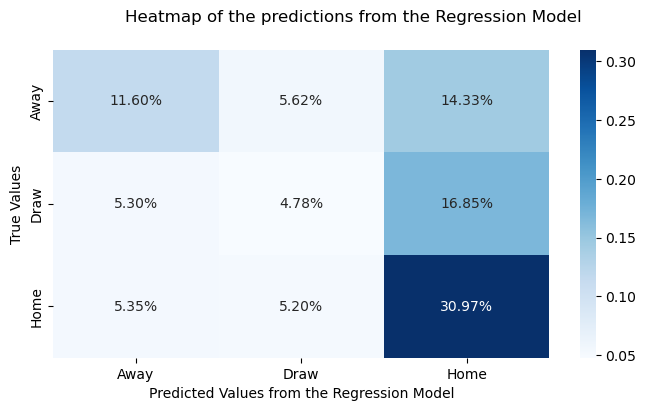

In [13]:
regression_results_heatmap(match_pred_model,betting_X_test, betting_y_test)


In [14]:
classification_results_report_reg(match_pred_model, betting_X_test, betting_y_test)

,A,D,H,accuracy
precision,0.521226,0.306397,0.498311,0.473491
recall,0.367720,0.177388,0.745891,0.473491
f1-score,0.431220,0.224691,0.597468,0.473491


Looking at these two, we can interpret a couple of things: 
1. The accuracy of our model is actually less than what we were able to obtain without applying any model on the betting data
2. Again, the recall for Home predictions is unusually high. So, the home wins were are identified correctly much more by the model compared to the other two outcomes. 

Using regression does not seem too promising here; however, we give it another try by using a more sophisticated model instead. We decide to create a Random Forest model. A random forest model is the average of multiple randomized regression trees. Randomizing and averaging smooths out the predictions from regression trees. 

Figure(800x400)


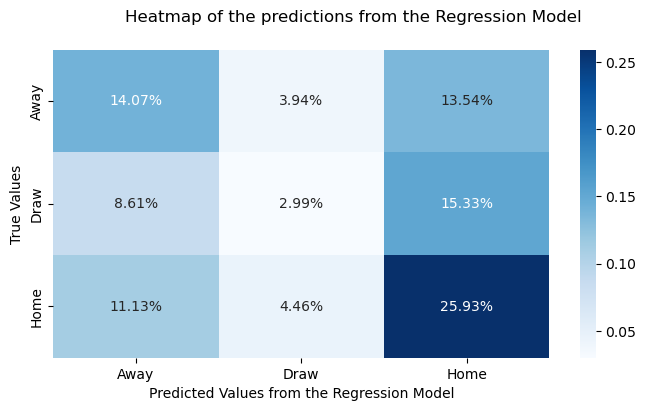

In [15]:
#Creating and fitting the forest model 
forest = RandomForestRegressor(n_estimators = 3, random_state = 123)
forest.fit(betting_X_train,betting_y_train)
#Using the function from earlier to test out our new model
regression_results_heatmap(forest,betting_X_test, betting_y_test)

In [16]:
classification_results_report_reg(forest, betting_X_test, betting_y_test)

,A,D,H,accuracy
precision,0.416149,0.262673,0.473180,0.429921
recall,0.445923,0.111111,0.624526,0.429921
f1-score,0.430522,0.156164,0.538420,0.429921


Again, we get a similar conclusion that training a model on the data actually seems to make the predictions worse. The accuracy on the testing set in the case of the random forest is actually worse than that of the Linear Regression. It is possible that training the model to predict goal difference could be making our prediction process convuluted. Now, we take the traditional route and decide to test out Classification. 

# Classification 

Since, this a multiclass classification problem. There were two ways to use classification here. Firstly, we could use a multinomial logistic regression model which would allow us to answer the multiclass classification. Secondly, we could split into 3 different binary classification problems where we could use the One V Rest method. This involves breaking down this problem into three binary classification problems:

- Problem 1 : Home Win Vs [Draw, Away Win]
- Problem 2 : Draw Vs [Home Win, Away Win]
- Problem 3 : Away Win Vs [Home Win, Draw]

There can be drawbacks for this strategy if we had a large number of classes but as the number of classes is only 3 hence, this strategy can be much more effective than other strategies.

We start by making use of multinomial logistic regression to build a classification model. 

In [20]:
#Changing the Y dataset to Full Time Results 
betting_Y = betodds_with_predictions["FTR"]
betting_x_train, betting_x_test, betting_Y_train, betting_Y_test = model_selection.train_test_split(betting_X, betting_Y, test_size=0.25, random_state = 123)

In [21]:
#Creating and fitting a multi_classification_model
multi_classification_model = linear_model.LogisticRegression(multi_class = "multinomial", max_iter = 10000, solver = "lbfgs",
                                                       random_state = 123, fit_intercept = False)

multi_classification_model.fit(betting_x_train, betting_Y_train)

# #Make some small changes to the earlier function so that it can be used for classification models as well 
def classification_results_heatmap(model_name, testing_X_data, testing_Y_data): 
    predictions = model_name.predict(testing_X_data) 
    cf_matrix = confusion_matrix(testing_Y_data, predictions, labels = model_name.classes_)
    
    fig, ax = plt.subplots(1, 1, figsize = (8, 4))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='inferno_r', ax = ax, xticklabels = model_name.classes_,
               yticklabels = model_name.classes_)
    fig.suptitle("Heatmap for the results from the Classification Model") 
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("True Values")

    print(fig)
    
def classification_results_report(model_name, testing_X_data, testing_Y_data):
    predictions = model_name.predict(testing_X_data)
    report = classification_report(testing_Y_data, predictions, output_dict = True) 
    report_df = pd.DataFrame(data = report) 
    return report_df.iloc[0:3, 0:4]



Figure(800x400)


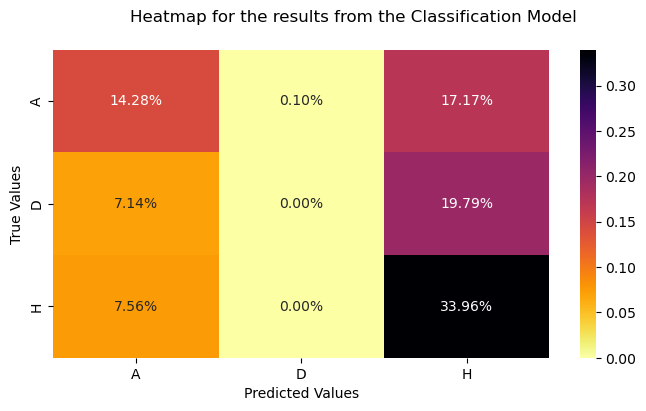

In [22]:
classification_results_heatmap(multi_classification_model, betting_x_test, betting_Y_test)

In [24]:
classification_results_report(multi_classification_model, betting_x_test, betting_Y_test)

,A,D,H,accuracy
precision,0.492754,0.0,0.478905,0.482415
recall,0.452579,0.0,0.817952,0.482415
f1-score,0.471813,0.0,0.604108,0.482415


With the multinomial logistic regression approach, we notice a few interesting things: 
1. Our accuracy seems to be better than both the regression approaches but it is still less than what we had achieved with the odds itself. 
2. Again, it seems like that the model is not predicting draws at all. This seems to be a reflection of the behaviour of the odds. 

Let's see if this can be fixed by using a One V Rest method. 


Figure(800x400)


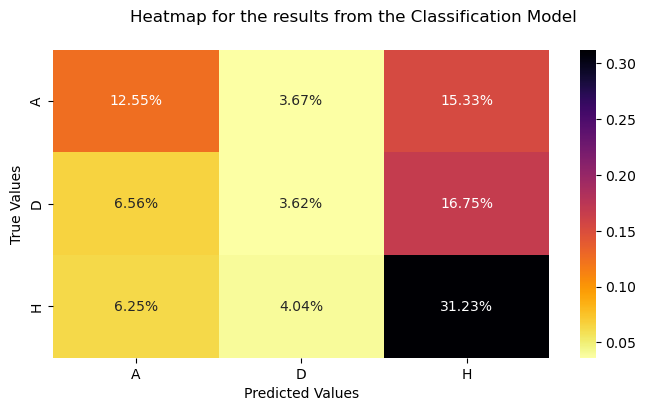

In [30]:
# Creating a SVC model based on OneVsRest Strategy
SVC_model = OneVsRestClassifier(SVC())
SVC_model.fit(betting_x_train, betting_Y_train)

#Printing the heatmap result based on this model 
classification_results_heatmap(SVC_model, betting_x_test, betting_Y_test)

In [31]:
#Printing the classification report for this model 
classification_results_report(SVC_model, betting_x_test, betting_Y_test)

,A,D,H,accuracy
precision,0.494824,0.319444,0.493367,0.474016
recall,0.397671,0.134503,0.752212,0.474016
f1-score,0.440959,0.189300,0.595894,0.474016


Since, this approach involves splitting into 3 binary classification problems. The model does predict draws this time but again the accuracy seems to not match upto the accuracy of just betting odds that we observed in the beginning. 

# Conclusions and Limitations

1. It is important to note that betting odds alone seem to make a decent predict since they can achieve an accuracy of around 48.5%. However, when we observe this fact in the context of the fact that there have been studies that have achieved an accuracy of around 88% for predicting the outcomes. [Source](https://arxiv.org/pdf/2211.15734.pdf)
2. It is probably wrong to say that betting odds incorporate all the information available about the match. The other conclusion would be that the odds have been altered significantly to ensure the bookmakers profitability that they do not anymore reflect accurate the likelihood of the outcomes. 
3. Training a model on multiple betting odds also seems to not payoff much since all of the models we trained were not able to replicate the accuracy of just betting odds. Regardless of the limitations of the model, we have created a useful dataset that has translated odds into actual predictions that can be used for further analysis in the future. 



# How well does Half Time Advantage correlate with Full time results. 

For this part of the project, we want to see what is the relationship between Half-Time results and Full Time results. Is the team winning at half time more likely to still win at Full Time? While the answer to this seems intuitive, we could not find much existing research on it and would like to produce some statistics and visualisations that can concretely answer this question. 

First, we modify the dataset a bit to help us answer this question. 

In [98]:
df_matchstats = df_clean[df_clean.columns[0:df_clean.columns.get_loc('FTR')+1]]
#Creating the full time advantage column
df_matchstats["FTA"] = df_matchstats["FTHG"] - df_matchstats["FTAG"]
#Creating the half time advantage column 
df_half = df_clean[df_clean.columns[0:df_clean.columns.get_loc('HTR')+1]]
df_matchstats = df_matchstats.merge(df_half)
df_matchstats["HTA"] = df_matchstats["HTHG"] - df_matchstats["HTAG"]
FTR = df_matchstats["FTR"]
HTR = df_matchstats["HTR"] 
FTA = df_matchstats["FTA"]
HTA = df_matchstats["HTA"] 
df_matchstats.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,FTA,HTHG,HTAG,HTR,HTA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,-2,0,1,A,-1
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,0,1,0,H,1
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,2,1,0,H,1
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,1,D,0
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,2,0,0,D,0


Firstly, we can visualise it using heatmaps similar to the ones we have seen above since we are just comparing classes.

Text(70.72222222222221, 0.5, 'Full Time outcome')

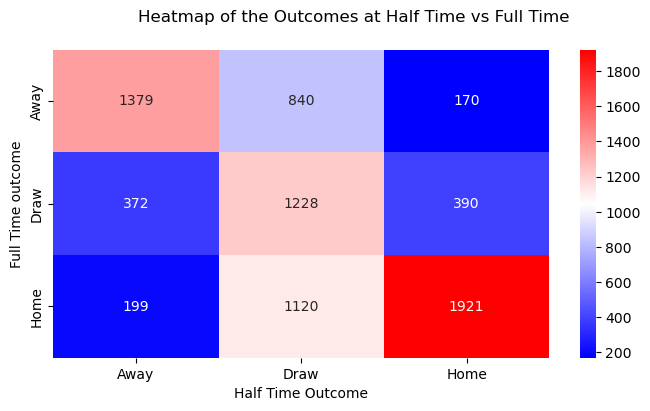

In [53]:
cf_matrix = confusion_matrix(FTR, HTR, labels = ["A", "D", "H"])
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='bwr', ax = ax, xticklabels = ["Away", "Draw", "Home"],
               yticklabels = ["Away", "Draw", "Home"]) 
fig.suptitle("Heatmap of the Outcomes at Half Time vs Full Time")
ax.set_xlabel("Half Time Outcome")
ax.set_ylabel("Full Time outcome")

Instead of using the half-time result and full-time result, we can also use the half-time advantage - which is the goal difference at half-time - and the full-time advantage - which is the goal difference at full-time. Let's visualise it using a boxplot now. 

Text(0, 0.5, 'Goal Difference at Full Time')

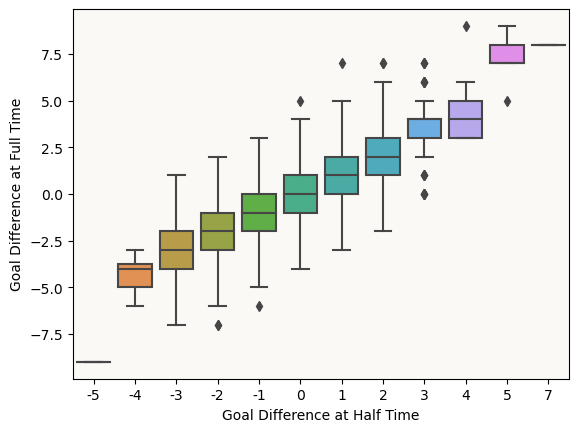

In [57]:
fig, ax = plt.subplots()
sns.boxplot(data=df_matchstats, x="HTA", y="FTA", ax = ax)
ax.set_facecolor("#FAF9F6")
ax.set_xlabel("Goal Difference at Half Time") 
ax.set_ylabel("Goal Difference at Full Time")

When we combine these visualisations, we can extract some interesting conclusions from both of these. 
1. If a team is down by 3 goals at half-time, they almost always lose the match. But if a team is down by only 2 or less goals, there still seems to be some chance of them making a comeback and winning the match at full time. 
2. We can also see our inuitive conclusion that if a team is winning at half-time, they are also, in most cases, winning at full time. 
3. Again intuitively, when the half-time result is a draw, it seems to be equally likely that either the home team wins or the away team wins(Home team actually wins more matches - which could be the home advantage that we have talked about). 

Let's see if we can visualise the home advantage that we have been mentioning through out the project. For this, instead of just focussing on the win-rate of home teams vs win-rate of away teams, we will also visualise the distribution of goals scored by home teams and the distribution of goals scored by away team. 

Note: every team gets to play the same amount of matches at home and away. 

Text(0.5, 0, 'Full Time Goals Scored')

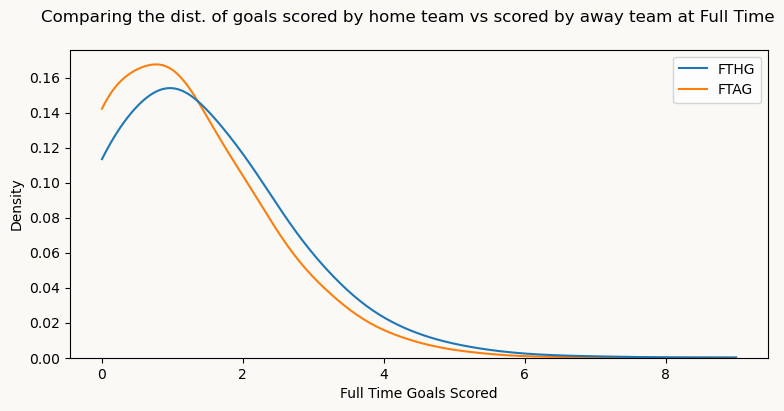

In [107]:
#Create a visualisation to see the disribution of full time goals 
density_plot_data = df_matchstats[["FTHG", "FTAG"]]
fig, ax = plt.subplots(figsize = (9, 4))
sns.kdeplot(data = density_plot_data, ax = ax, bw_adjust=3, cut=0,
   alpha=1)
fig.set_facecolor("#FAF9F6")
ax.set_facecolor("#FAF9F6")
fig.suptitle("Comparing the dist. of goals scored by home team vs scored by away team at Full Time")
ax.set_xlabel("Full Time Goals Scored")

We can clearly see that more goals are scored the home team at full team while the away team is more likely to score less than 2 goals. Let's see if the win-rate also supports this conclusion. 

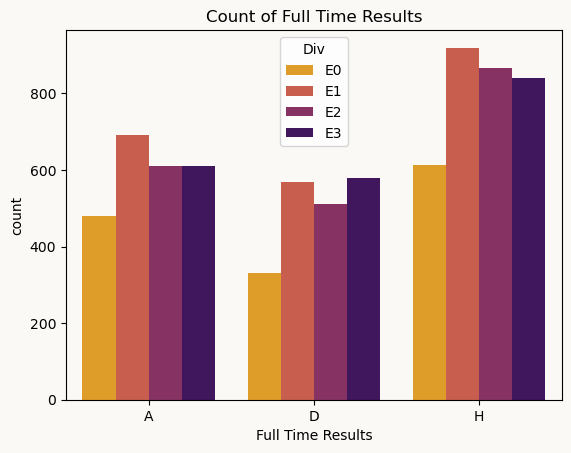

In [108]:
#Creating a visualisation to see the count of full time results 
fig, ax = plt.subplots()
sns.countplot(x='FTR',data=df_matchstats, palette='inferno_r', hue='Div')
plt.title("Count of Full Time Results")
ax.set_xlabel('Full Time Results')
fig.set_facecolor("#FAF9F6")
ax.set_facecolor("#FAF9F6")

Both of these visualisations let us observe the Home Advantage and how the home team wins more often than not. 

Lastly, let's see if the home advantage is also reflected in the relationship between the half-time result and the full-time result. To do this, we calculate what percentage of matches are won by the home team if they are already leading at half-time and compare this with the number of matches won by the away team if they are leading at half-time. We expect to see that more matches are won by the home-team when they are already leading. 

In [123]:
#Computing the repsective win-rates 
df_hometeam = df_matchstats.query("HTA > 0")
rate1 = len(df_hometeam.query("FTA > 0"))*100/len(df_hometeam)

df_awayteam = df_matchstats.query("HTA < 0")
rate2 = len(df_awayteam.query("FTA < 0"))*100/len(df_awayteam)

print(f"Home team win rate when they are leading at half-time = {rate1}%")
print(f"Away team win rate when they are leading at half-time = {rate2}%")

Home team win rate when they are leading at half-time = 77.42845626763402%
Away team win rate when they are leading at half-time = 70.71794871794872%


As we expected, the home team does win more of their matches when they are leading at half-time compared to away teams. Note that in both cases, the team that is already leading at half time, does win the match more often than not - which is what we observed in the first two visualisations of this part as well. 

## Notes 
The project has been uploaded on [Github](https://github.com/apramm/econ323-project). The work was divided evenly with Sahaj focusing more on the interpretation and the visualisations. Apram worked on data cleaning. Both of us worked evenly on the regression and classification aspect. 